# XID+ Example Output Analysis

(This is based on a Jupyter notebook, available in the [XID+ package](https://github.com/H-E-L-P/XID_plus/tree/master/docs/notebooks/examples/) and can be interactively run and edited)

This notebook provides some example code for basic analysis of the XID+ outputs, including:

1. Loading up output
2. Creating Posterior replicated maps and animations
3. Creating marginalised posterior plots
4. Creating Bayesian p-value maps

Import required modules

In [2]:
import pylab as plt
%matplotlib inline


import numpy as np
import xidplus
from xidplus import moc_routines
output_folder='../../../test_files/'

Load up posterior output from XID+

In [3]:
priors,posterior=xidplus.load(output_folder+'Tile_5600106_10.pkl')
priors,posterior_numpyro=xidplus.load(output_folder+'Tile_5600106_10_numpyro.pkl')

In order to compare how good our fit is, its often useful to look at original map. There is a routine within XID+ that makes the original fits map from the data stored within the prior class. Lets use that to make the SPIRE maps for the region we have fit.

Now lets use the [Seaborn](https://stanford.edu/~mwaskom/software/seaborn/index.html) plotting package and [APLpy](http://aplpy.readthedocs.io/en/stable/) package to view those maps, plotting the sources we have fit on top of those maps.

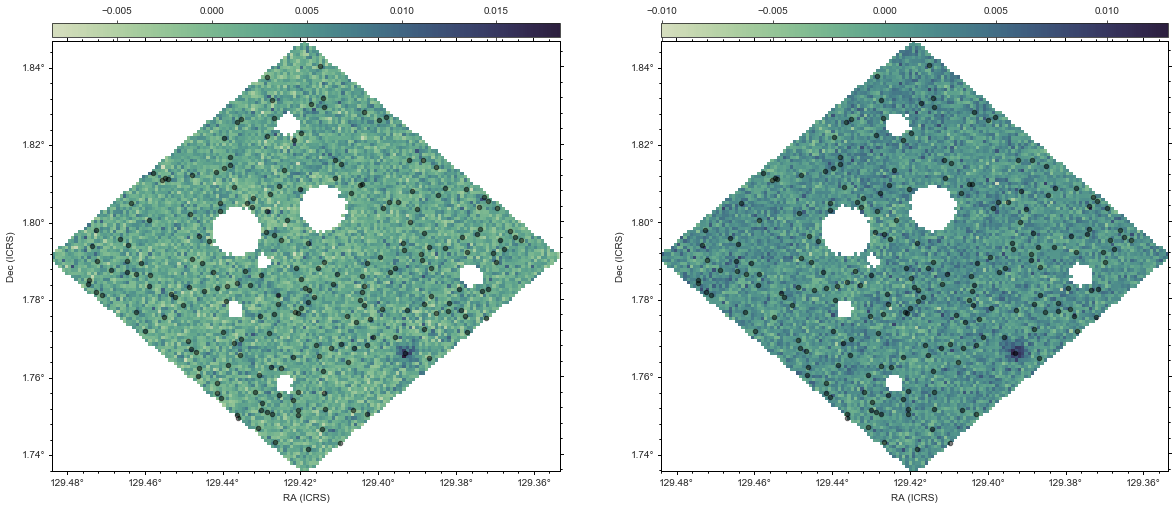

In [4]:
figs,fig=xidplus.plot_map(priors)

### Posterior replicated data

We can use each sample we have from the posterior, and use it to make a replicated map, including simulating the instrumental noise, and the estimated confusion noise. You can think of these maps as all the possible maps that are allowed by the data. 

> NOTE: You will require the `FFmpeg` library installed to run the movie

In [5]:
xidplus.replicated_map_movie(priors,posterior,50)

In [6]:
xidplus.replicated_map_movie(priors,posterior_numpyro,50)

### Posterior Predictive checking and Bayesian P-value maps

When examining goodness of fits, the typical method is to look at the residuals. i.e. $\frac{data - model}{\sigma}$. Because we have distribution of $y^{rep}$, we can do this in a more probabilisitic way using posterior predictive checks. For more information on posterior predictive checks, [Gelman et al. 1996](http://www.stat.columbia.edu/~gelman/research/published/A6n41.pdf) is a good starting point.



For our case, the best way to carry out posterior predictive checks is to think about one pixel. We can look at where the real flux value for our pixel is in relation to the distribution from $y^{rep}$. 



We can calculate fraction of $y^{rep}$ samples above and below real map value. This is often referred to as the Bayesian p-value and is telling us the probability of drawing the real pixel value, from our model which has been inferred on the data. This is tells us if the model is inconsistent with the data, given the uncertianties in parameters and data.

* $\sim 0.5$ means our model is consistent with the data 
* 0.99 or 0.01 means model is missing something.

We can convert this to a typical '$\sigma$' level and create map versions of these Bayesian p-values:

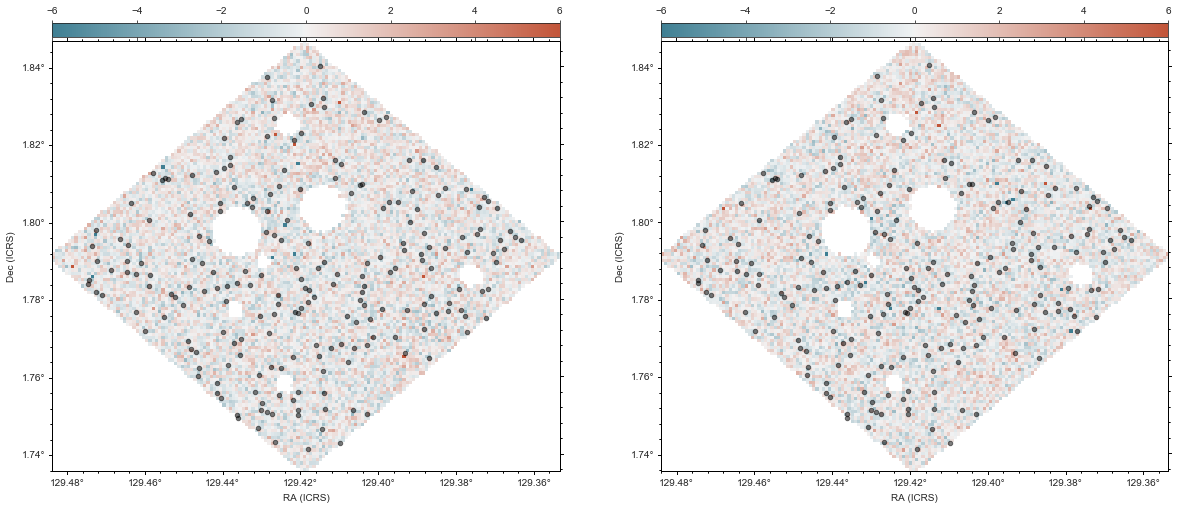

In [10]:
figs, fig=xidplus.plot_Bayes_pval_map(priors, posterior)

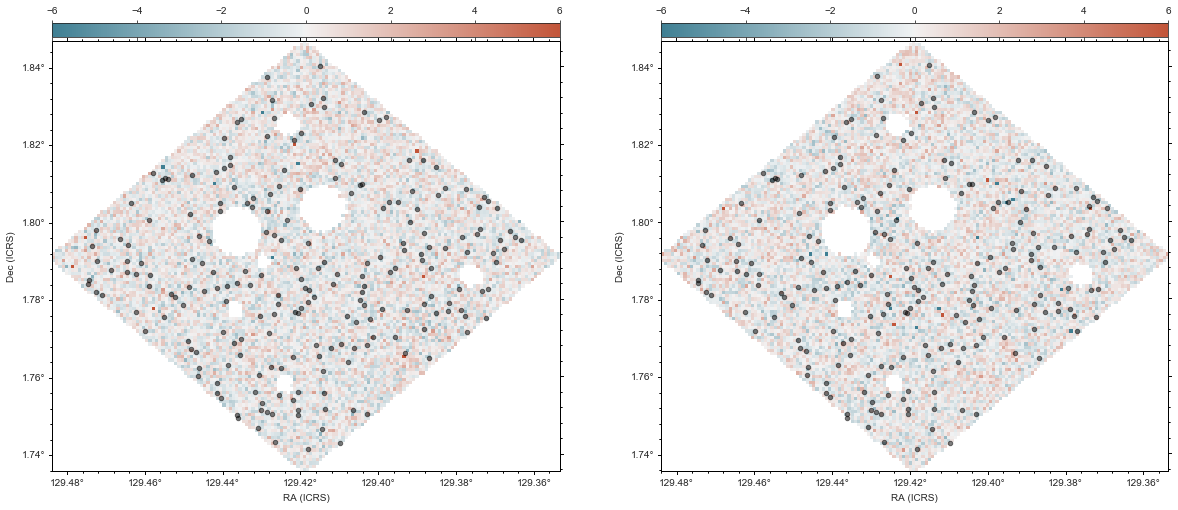

In [11]:
figs, fig=xidplus.plot_Bayes_pval_map(priors, posterior_numpyro)

Red indicates the flux value in the real map is higher than our model thinks is possible. This could be indicating there is a source there that is not in our model.
Blue indicates the flux in the real map is lower than in our model. This is either indicating a very low density region or that too much flux has been assigned to one of the sources.

Read in Bayesian P value maps and compare between Stan and Numpyro

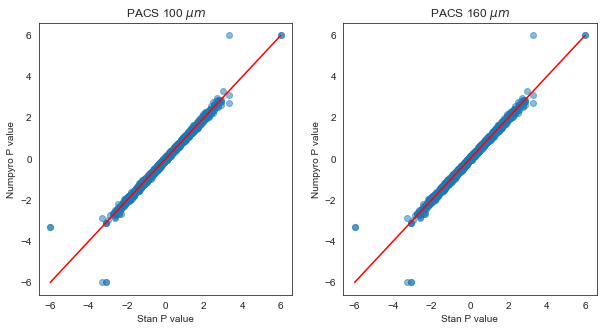

In [23]:
from astropy.io import fits
stan_pval=[]
numpyro_pval=[]
fig,axes=plt.subplots(1,2,figsize=(10,5))
for i,b in enumerate([100,160]):
    stan_pval.append(fits.open(
        output_folder+'Tile_5600106_10_PACS_{}_Bayes_Pval.fits'.format(b)))
    numpyro_pval.append(fits.open(
        output_folder+'Tile_5600106_10_numpyro_PACS_{}_Bayes_Pval.fits'.format(b)))
    axes[i].plot(stan_pval[0][1].data.flatten(),numpyro_pval[0][1].data.flatten(),'o',alpha=0.5)
    axes[i].set_xlabel('Stan P value')
    axes[i].set_ylabel('Numpyro P value')
    axes[i].set_title('PACS {} $\mu m$'.format(b))
    axes[i].plot(np.arange(-6,7),np.arange(-6,7),'r')

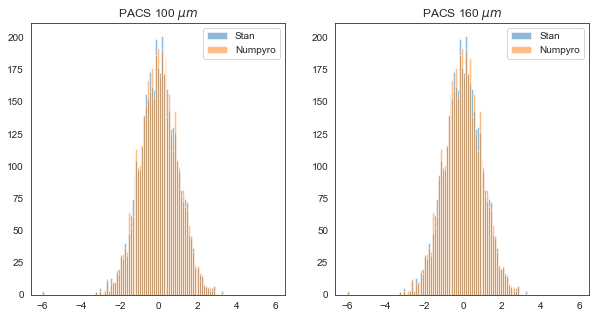

In [62]:
from astropy.io import fits
stan_pval=[]
numpyro_pval=[]
fig,axes=plt.subplots(1,2,figsize=(10,5))
for i,b in enumerate([100,160]):
    stan_pval.append(fits.open(
        output_folder+'Tile_5600106_10_PACS_{}_Bayes_Pval.fits'.format(b)))
    numpyro_pval.append(fits.open(
        output_folder+'Tile_5600106_10_numpyro_PACS_{}_Bayes_Pval.fits'.format(b)))
    axes[i].hist(stan_pval[0][1].data.flatten(),bins=np.arange(-6,6,0.1),alpha=0.5,label='Stan')
    axes[i].hist(numpyro_pval[0][1].data.flatten(),bins=np.arange(-6,6,0.1),alpha=0.5,label='Numpyro')
    axes[i].legend()
    axes[i].set_title('PACS {} $\mu m$'.format(b))


### Check table
Lets read in table with Astropy table

In [24]:
from astropy.table import Table

In [25]:
stan_cat=Table.read(output_folder+'Tile_5600106_10_PACS_cat.fits')
numpyro_cat=Table.read(output_folder+'Tile_5600106_10_numpyro_PACS_cat.fits')

In [35]:
stan_cat[0:5]

<Table length=5>
          help_id                   RA         ... Pval_res_100 Pval_res_160
                                 degrees       ...                          
          bytes27                float64       ...   float32      float32   
--------------------------- ------------------ ... ------------ ------------
HELP_J083730.528+014731.191 129.37720144107425 ...          1.0          1.0
HELP_J083731.896+014735.697 129.38290131273436 ...          1.0          1.0
HELP_J083732.747+014717.252 129.38644745087262 ...          1.0          1.0
HELP_J083732.888+014736.006 129.38703408540098 ...          1.0          1.0
HELP_J083733.173+014749.506  129.3882208368662 ...          1.0          1.0

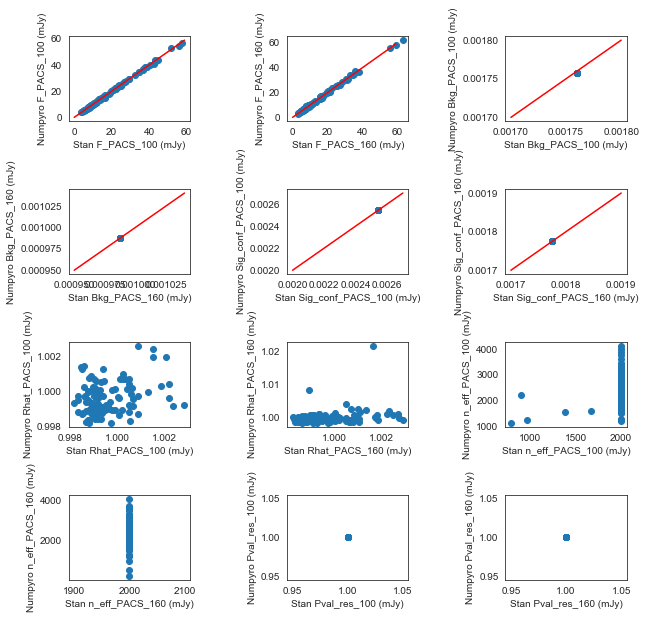

In [57]:
fig,axes=plt.subplots(4,3,figsize=(10,10))

#F_PACS_100
axes[0,0].plot(stan_cat['F_PACS_100'],numpyro_cat['F_PACS_100'],'o')
axes[0,0].plot(np.arange(0,60),np.arange(0,60),'r')
axes[0,0].set_xlabel('Stan F_PACS_100 (mJy)')
axes[0,0].set_ylabel('Numpyro F_PACS_100 (mJy)')

#F_PACS_160
axes[0,1].plot(stan_cat['F_PACS_160'],numpyro_cat['F_PACS_160'],'o')
axes[0,1].plot(np.arange(0,60),np.arange(0,60),'r')
axes[0,1].set_xlabel('Stan F_PACS_160 (mJy)')
axes[0,1].set_ylabel('Numpyro F_PACS_160 (mJy)')

# Bkg_100
axes[0,2].plot(stan_cat['Bkg_PACS_100'],numpyro_cat['Bkg_PACS_100'],'o')
axes[0,2].set_xlabel('Stan Bkg_PACS_100 (mJy)')
axes[0,2].set_ylabel('Numpyro Bkg_PACS_100 (mJy)')
axes[0,2].plot(np.arange(0.0017,0.0018,0.0001),np.arange(0.0017,0.0018,0.0001),'r')

# Bkg_160
axes[1,0].plot(stan_cat['Bkg_PACS_160'],numpyro_cat['Bkg_PACS_160'],'o')
axes[1,0].set_xlabel('Stan Bkg_PACS_160 (mJy)')
axes[1,0].set_ylabel('Numpyro Bkg_PACS_160 (mJy)')
axes[1,0].plot(np.arange(0.00095,0.00105,0.00001),np.arange(0.00095,0.00105,0.00001),'r')

# Sig_conf_100
axes[1,1].plot(stan_cat['Sig_conf_PACS_100'],numpyro_cat['Sig_conf_PACS_100'],'o')
axes[1,1].set_xlabel('Stan Sig_conf_PACS_100 (mJy)')
axes[1,1].set_ylabel('Numpyro Sig_conf_PACS_100 (mJy)')
axes[1,1].plot(np.arange(0.002,0.0028,0.0001),np.arange(0.002,0.0028,0.0001),'r')

# Sig_conf_160
axes[1,2].plot(stan_cat['Sig_conf_PACS_160'],numpyro_cat['Sig_conf_PACS_160'],'o')
axes[1,2].set_xlabel('Stan Sig_conf_PACS_160 (mJy)')
axes[1,2].set_ylabel('Numpyro Sig_conf_PACS_160 (mJy)')
axes[1,2].plot(np.arange(0.0017,0.0019,0.0001),np.arange(0.0017,0.0019,0.0001),'r')

# Rhat_100
axes[2,0].plot(stan_cat['Rhat_PACS_100'],numpyro_cat['Rhat_PACS_100'],'o')
axes[2,0].set_xlabel('Stan Rhat_PACS_100 (mJy)')
axes[2,0].set_ylabel('Numpyro Rhat_PACS_100 (mJy)')

# Rhat_160
axes[2,1].plot(stan_cat['Rhat_PACS_160'],numpyro_cat['Rhat_PACS_160'],'o')
axes[2,1].set_xlabel('Stan Rhat_PACS_160 (mJy)')
axes[2,1].set_ylabel('Numpyro Rhat_PACS_160 (mJy)')

# n_eff_100
axes[2,2].plot(stan_cat['n_eff_PACS_100'],numpyro_cat['n_eff_PACS_100'],'o')
axes[2,2].set_xlabel('Stan n_eff_PACS_100 (mJy)')
axes[2,2].set_ylabel('Numpyro n_eff_PACS_100 (mJy)')

# n_eff_160
axes[3,0].plot(stan_cat['n_eff_PACS_160'],numpyro_cat['n_eff_PACS_160'],'o')
axes[3,0].set_xlabel('Stan n_eff_PACS_160 (mJy)')
axes[3,0].set_ylabel('Numpyro n_eff_PACS_160 (mJy)')

# Pval_res_100
axes[3,1].plot(stan_cat['Pval_res_100'],numpyro_cat['Pval_res_100'],'o')
axes[3,1].set_xlabel('Stan Pval_res_100 (mJy)')
axes[3,1].set_ylabel('Numpyro Pval_res_100 (mJy)')

# Pval_res_160
axes[3,2].plot(stan_cat['Pval_res_160'],numpyro_cat['Pval_res_160'],'o')
axes[3,2].set_xlabel('Stan Pval_res_160 (mJy)')
axes[3,2].set_ylabel('Numpyro Pval_res_160 (mJy)')

plt.subplots_adjust(hspace=0.8,wspace=0.8)

In [ ]:
# Pval_res_100
axes[2,2].plot(stan_cat['Pval_res_PACS_100'],numpyro_cat['Pval_res_PACS_100'],'o')
axes[2,2].set_xlabel('Stan Pval_res_PACS_100 (mJy)')
axes[2,2].set_ylabel('Numpyro Pval_res_PACS_100 (mJy)')

# Pval_res_160
axes[3,0].plot(stan_cat['Pval_res_PACS_160'],numpyro_cat['Pval_res_PACS_160'],'o')
axes[3,0].set_xlabel('Stan Pval_res_PACS_160 (mJy)')
axes[3,0].set_ylabel('Numpyro Pval_res_PACS_160 (mJy)')

## Investigate the P val res statistic and why they are all 1

In [84]:
post_rep_maps = postmaps.replicated_maps(priors, posterior, nrep=2000)
post_rep_map_numpyros = postmaps.replicated_maps(priors, posterior_numpyro, nrep=2000)


In [97]:
post_rep_map=post_rep_maps[0]
prior=priors[0]
Bayes_pval_res_vals=np.empty((prior.nsrc))
mean_t=[]
for i in range(0,prior.nsrc):
    ind= prior.amat_col == i
    t = np.sum(((post_rep_map[prior.amat_row[ind], :] - prior.sim[prior.amat_row[ind], None]) / (
    np.sqrt(2) *prior.snim[prior.amat_row[ind], None])) ** 2.0, axis=0)
    ind_T = t / ind.sum() > 2
    mean_t.append(np.mean(t/ind.sum()))
    Bayes_pval_res_vals[i] = ind_T.sum()/np.float(post_rep_map.shape[1])



(array([ 3.,  8., 37., 43., 51., 40., 19., 13.,  0.,  2.]),
 array([4.91560588, 5.10317511, 5.29074433, 5.47831355, 5.66588278,
        5.853452  , 6.04102122, 6.22859045, 6.41615967, 6.60372889,
        6.79129812]),
 <a list of 10 Patch objects>)

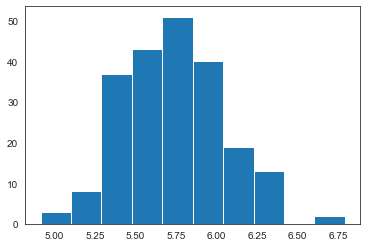

In [98]:
plt.hist(mean_t)

They are all above 2, indicating not a great fit. Looking at the Bayesian P value maps everything looks ok but that doesn't consider the noise map directly (it does when fitting) where as the P value res statistic does. 

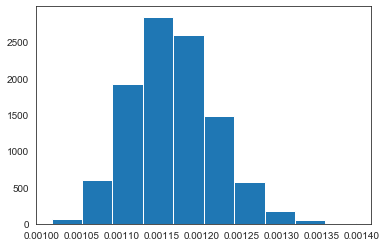

In [95]:
plt.hist(prior.snim);

In [96]:
stan_cat

<Table length=101>
          help_id                   RA         ... Pval_res_100 Pval_res_160
                                 degrees       ...                          
          bytes27                float64       ...   float32      float32   
--------------------------- ------------------ ... ------------ ------------
HELP_J083730.528+014731.191 129.37720144107425 ...          1.0          1.0
HELP_J083731.896+014735.697 129.38290131273436 ...          1.0          1.0
HELP_J083732.747+014717.252 129.38644745087262 ...          1.0          1.0
HELP_J083732.888+014736.006 129.38703408540098 ...          1.0          1.0
HELP_J083733.173+014749.506  129.3882208368662 ...          1.0          1.0
HELP_J083733.318+014723.988 129.38882435385403 ...          1.0          1.0
HELP_J083733.335+014729.811 129.38889552397652 ...          1.0          1.0
HELP_J083733.616+014811.553  129.3900664178244 ...          1.0          1.0
HELP_J083734.021+014759.382  129.3917546357536 ...          1.0          1.0
                        ...                ... ...          ...          ...
HELP_J083745.955+014658.482  129.4414772014258 ...          1.0          1.0
HELP_J083746.175+014713.839 129.44239635698236 ...          1.0          1.0
HELP_J083746.445+014742.703 129.44351935372345 ...          1.0          1.0
HELP_J083746.741+014656.365  129.4447543955566 ...          1.0          1.0
HELP_J083746.880+014722.473 129.44533350160629 ...          1.0          1.0
HELP_J083747.050+014746.981 129.44604109094485 ...          1.0          1.0
HELP_J083747.503+014726.161  129.4479312212228 ...          1.0          1.0
HELP_J083747.636+014808.091   129.448483208028 ...          1.0          1.0
HELP_J083747.688+014659.963 129.44869943032884 ...          1.0          1.0
HELP_J083750.603+014722.410 129.46084750206353 ...          1.0          1.0